<h2 style="background:#003441; color:white; padding:3px 20px; text-align:center">
Samia Nasser,data science intern in Sparks Foundation,
February  2023 Batch</h2>


<h2  style="background: #009dc4; color:white; padding:10px 20px;">
 Task2 : Prediction using Unsupervised ML
</h2>



<h4 style="background:#c9f4fe; color:black; padding:3px 20px;">
#Step1
    <br>    <br> Get the data  </h4>



In [34]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Iris_data=pd.read_csv('Iris.csv')
Iris_data

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  

[150 rows x 6 columns]


<h4 style="background:#c9f4fe; color:black; padding:3px 20px;">
#Step2
    <br>    <br> Discover and visualize the data to gain insights </h4>



In [35]:
Iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [36]:
#to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values
Iris_data.describe()

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000

In [37]:
#returns the total number of rows irrespective of missing values.
Iris_data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [38]:
# Get the unique values of ‘Species’ column
Iris_data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)


<h4 style="background:#c9f4fe; color:black; padding:3px 20px;">
#Step3
    <br>    <br> split data to train and test data </h4>



In [39]:
X = Iris_data.drop(['Id', 'Species'], axis = 1)
Y = Iris_data['Species']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size = 0.25, 
        random_state = 100, stratify = Y)

C:\Users\Eng.samiah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eng.samiah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eng.samiah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Eng.samiah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

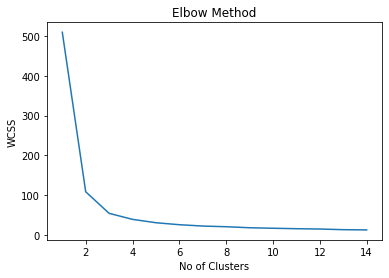

In [41]:
from sklearn.cluster import KMeans
wcss = []
#  inertia, which is
# the mean squared distance between each instance and its closest centroid
# An important improvement to the K-Means algorithm, K-Means++, the K-Means++ initialization algorithm
for i in range(1,15):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state = 100)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.title('Elbow Method')
plt.plot(range(1,15), wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.show()

The Elbow Method shows that 3 is the perfect cluster size

In [42]:
# Fitting with correct clusters
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = 100)
kmeans.fit(X)
Iris_data['Cluster'] = kmeans.predict(X)


C:\Users\Eng.samiah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [43]:
Iris_data['Cluster'].unique()

array([0, 1, 2])

In [44]:
Iris_data['Cluster'].value_counts()

1    62
0    50
2    38
Name: Cluster, dtype: int64

In [47]:
Iris_data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [48]:
#  Principal component analysis(PCA) dimensionality reduction techniques
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

X_pca = pca.fit_transform(X)

df_plot = pd.DataFrame(X_pca, columns=['PCA_1', 'PCA_2'])
df_plot['Species'] = Iris_data['Species'].values
df_plot['Cluster'] = Iris_data['Cluster'].values
df_plot['Cluster'] = Iris_data['Cluster'].astype(str)

# Adding colors for better visualization
colors_dict = {
    'Iris-setosa' : 'red',
    'Iris-versicolor' : 'green',
    'Iris-virginica' : 'blue',
    '0' : 'red',
    '1' : 'green',
    '2' : 'blue'
}

df_plot['Species_Color'] = df_plot['Species'].apply(lambda x : colors_dict[x])
df_plot['Cluster_Color'] = df_plot['Cluster'].apply(lambda x : colors_dict[x])

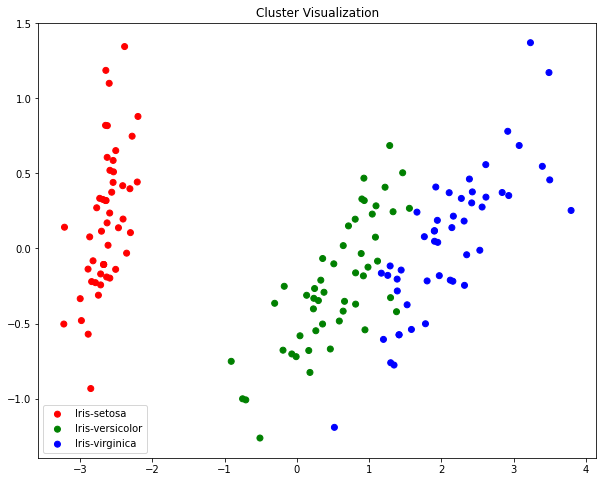

In [55]:
plt.figure(figsize=(10,8))
plt.title('Cluster Visualization')
for species in df_plot['Species'].unique():
    tmp_species = df_plot[df_plot['Species'] == species]
    plt.scatter(tmp_species['PCA_1'], tmp_species['PCA_2'], c= tmp_species['Species_Color'].values, label=species)
plt.legend()
plt.show()

From the plot, we have the below observations :

Red of Actuals = Red of Clusters (Iris-Setosa = 0)

Green of Actuals = Green of Clusters (Iris-versicolor = 1)

Blue of Actuals = Blue of Clusters (Iris-virginica = 2)


In [56]:
# Mapping Cluster Numbers back to Species Name
mapping_dict = {
    'Iris-setosa' : '0',
    'Iris-versicolor' : '1',
    'Iris-virginica' : '2',
}

reverse_mapping_dict = dict()
for key,value in mapping_dict.items():
    reverse_mapping_dict[value] = key
    
Iris_data['Species_Code'] = Iris_data['Species'].apply(lambda x : mapping_dict[x])
Iris_data['Cluster'] = Iris_data['Cluster'].astype(str)
Iris_data['Cluster_Species_Name'] = Iris_data['Cluster'].apply(lambda x : reverse_mapping_dict[x])


 # Using Classification Metrics To Quantify Prediction

In [57]:
from sklearn.metrics import *
acc_score = accuracy_score(Iris_data['Species_Code'], Iris_data['Cluster'])
print("Accuracy Score : " + str(np.round(acc_score * 100, 2)) + " %")

Accuracy Score : 89.33 %


### Good !

Understanding the Difference

In [58]:
mis_classified_df = Iris_data[Iris_data['Cluster'] != Iris_data['Species_Code']]
mis_classified_df.shape


(16, 9)

In [59]:
columns_order = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 
                 'Species_Code', 'Species', 'Cluster', 'Cluster_Species_Name']
mis_classified_df = mis_classified_df[columns_order]
mis_classified_df

Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
52    53            6.9           3.1            4.9           1.5   
77    78            6.7           3.0            5.0           1.7   
101  102            5.8           2.7            5.1           1.9   
106  107            4.9           2.5            4.5           1.7   
113  114            5.7           2.5            5.0           2.0   
114  115            5.8           2.8            5.1           2.4   
119  120            6.0           2.2            5.0           1.5   
121  122            5.6           2.8            4.9           2.0   
123  124            6.3           2.7            4.9           1.8   
126  127            6.2           2.8            4.8           1.8   
127  128            6.1           3.0            4.9           1.8   
133  134            6.3           2.8            5.1           1.5   
138  139            6.0           3.0            4.8           1.8   
142  143            5.8           2.7            5.1           1.9   
146  147            6.3           2.5            5.0           1.9   
149  150            5.9           3.0            5.1           1.8   

    Species_Code          Species Cluster Cluster_Species_Name  
52             1  Iris-versicolor       2       Iris-virginica  
77             1  Iris-versicolor       2       Iris-virginica  
101            2   Iris-virginica       1      Iris-versicolor  
106            2   Iris-virginica       1      Iris-versicolor  
113            2   Iris-virginica       1      Iris-versicolor  
114            2   Iris-virginica       1      Iris-versicolor  
119            2   Iris-virginica       1      Iris-versicolor  
121            2   Iris-virginica       1      Iris-versicolor  
123            2   Iris-virginica       1      Iris-versicolor  
126            2   Iris-virginica       1      Iris-versicolor  
127            2   Iris-virginica       1      Iris-versicolor  
133            2   Iris-virginica       1      Iris-versicolor  
138            2   Iris-virginica       1      Iris-versicolor  
142            2   Iris-virginica       1      Iris-versicolor  
146            2   Iris-virginica       1      Iris-versicolor  
149            2   Iris-virginica       1      Iris-versicolor